In [26]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
from math import sqrt

Load Data

In [27]:
tv = TvDatafeed()
print('')

df = tv.get_hist(symbol='SET:SET50', exchange='SET', interval=Interval.in_monthly, n_bars=121)
set50 = df[['close']]
set50.rename(columns = {'close':'set50'}, inplace=True)

name = ['SET:ADVANC', 'SET:AOT', 'SET:AWC', 'SET:BANPU', 'SET:BBL', 'SET:BDMS', 'SET:BEM', 'SET:BGRIM', 'SET:BH', 'SET:BTS', 'SET:CBG', 'SET:CENTEL', 'SET:COM7', 'SET:CPALL', 'SET:CPF', 'SET:CPN', 'SET:CRC', 'SET:DELTA', 'SET:EA', 'SET:EGCO', 'SET:GLOBAL', 'SET:GPSC', 'SET:GULF', 'SET:HMPRO', 'SET:INTUCH', 'SET:IVL', 'SET:KBANK', 'SET:KCE', 'SET:KTB', 'SET:KTC', 'SET:LH', 'SET:MINT', 'SET:MTC', 'SET:OR', 'SET:OSP', 'SET:PTT', 'SET:PTTEP', 'SET:PTTGC', 'SET:RATCH', 'SET:SAWAD', 'SET:SCB', 'SET:SCC', 'SET:SCGP', 'SET:TISCO', 'SET:TOP', 'SET:TRUE', 'SET:TTB', 'SET:TU', 'SET:WHA', 'SET:TLI']

#load all set50 data
for i in range (len(name)):
    df = tv.get_hist(symbol=name[i], exchange='SET', interval=Interval.in_monthly, n_bars=121)
    df = df[['close']]
    set50 = pd.merge(set50, df, left_index=True, right_index=True, how='outer')
    set50.rename(columns = {'close':name[i]}, inplace=True)
#print(set50)

df_return = set50.pct_change() * 100
#drop nan based on stocks with the least histirical data
#df_return = df_return.dropna()
#print(df_return)

C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_8968\567102184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set50.rename(columns = {'close':'set50'}, inplace=True)


Sharpe Calculation from Average Return

In [28]:
#data of the current month assumes price closes at current price


rf = 2.269432

#currently there is a problem with real-time data on tradingview, when the problem is fixed, use the code below instead of typing risk-free rate manually

############rfr = tv.get_hist(symbol='TVC:TH01Y', exchange='TVC', interval=Interval.in_monthly, n_bars=1)
############rf = rfr['close'][0]
interval = ['1Y-sharpe', '3Y-sharpe', '5Y-sharpe', '10Y-sharpe']
r_interval = ['1Y-avg_r','3Y-avg_r','5Y-avg_r','10Y-avg_r']
std_interval = ['1Y-std','3Y-std','5Y-std','10Y-std']
conclu = pd.DataFrame(name, columns=['SET50'])
for j in range (len(interval)):
    if j == 0 :
        wo = 12
    elif j == 1:
        wo = 36
    elif j == 2:
        wo = 60
    else:
        wo = 120
    mean_list = []
    std_list = []
    for k in range (len(name)):
        data = df_return[name[k]].iloc[-wo:]
        if data.isnull().values.any():
            mean_list.append(np.nan)
            std_list.append(np.nan)
            continue
        mean = data.mean() * 12
        mean_list.append(mean)
        std = data.std() * sqrt(12)
        std_list.append(std)
    conclu['rrf'] = rf

    conclu[r_interval[j]] = np.array(mean_list)
    conclu[std_interval[j]] = np.array(std_list)
    conclu[interval[j]] = (conclu[r_interval[j]]-conclu['rrf'])/conclu[std_interval[j]]
    
conclu
#conclu.to_excel('Sharpe.xlsx')


,SET50,rrf,1Y-avg_r,1Y-std,1Y-sharpe,3Y-avg_r,3Y-std,3Y-sharpe,5Y-avg_r,5Y-std,5Y-sharpe,10Y-avg_r,10Y-std,10Y-sharpe
0,SET:ADVANC,2.269432,-7.084399,14.043655,-0.666054,6.095065,16.234632,0.235646,2.032412,16.073332,-0.014746,-0.090509,19.481516,-0.121137
1,SET:AOT,2.269432,-11.196743,15.078562,-0.893068,2.570124,15.171571,0.019819,1.987276,25.476307,-0.011075,14.501816,22.429671,0.545366
2,SET:AWC,2.269432,-16.091740,26.670808,-0.688437,0.358491,26.013795,-0.073459,NaN,NaN,NaN,NaN,NaN,NaN
3,SET:BANPU,2.269432,-48.465082,23.823015,-2.129643,-17.029777,30.274045,-0.637484,-11.419545,38.136287,-0.358949,-6.874948,33.877134,-0.269928
4,SET:BBL,2.269432,-12.684421,16.257081,-0.919836,5.545768,18.498396,0.177115,-5.122363,23.599638,-0.313216,-1.365522,19.222173,-0.189102
5,SET:BDMS,2.269432,-3.840706,10.694524,-0.571333,9.378798,13.330995,0.533296,3.772432,19.876214,0.075618,8.443821,20.620268,0.299433
6,SET:BEM,2.269432,-5.716614,20.303338,-0.393337,2.441876,18.415916,0.009364,-3.052160,23.232531,-0.229058,NaN,NaN,NaN
7,SET:BGRIM,2.269432,-30.825521,39.486638,-0.838130,-11.575870,30.237027,-0.457892,0.927230,34.487976,-0.038918,NaN,NaN,NaN
8,SET:BH,2.269432,-0.436816,29.439776,-0.091925,20.424186,23.420415,0.775168,9.125594,29.549248,0.232025,11.736810,26.303027,0.359935
9,SET:BTS,2.269432,-14.902355,32.441663,-0.529313,-9.119241,22.467548,-0.506894,-9.159594,26.129185,-0.437405,-0.617790,21.096667,-0.136857


In [29]:
for j in range (len(interval)):
    neg = conclu[conclu[interval[j]] < 0]
    #print("Stocks that underperform the risk-free rate:")
    #print(neg[['SET50','1Y-sharpe']])

    # Print stocks with positive Sharpe ratio
    pos = conclu[conclu[interval[j]] >= 0]
    #print("\nStocks that outperformed risk-free rate:")
    #print(pos[['SET50',interval[j]]])

In [30]:
for j in range (len(interval)):
    good = conclu[conclu[interval[j]] >= 1]
    print("\nStocks with acceptable performance:")
    print(good[['SET50',interval[j]]])


Stocks with acceptable performance:
      SET50  1Y-sharpe
44  SET:TOP   1.006418

Stocks with acceptable performance:
Empty DataFrame
Columns: [SET50, 3Y-sharpe]
Index: []

Stocks with acceptable performance:
Empty DataFrame
Columns: [SET50, 5Y-sharpe]
Index: []

Stocks with acceptable performance:
Empty DataFrame
Columns: [SET50, 10Y-sharpe]
Index: []


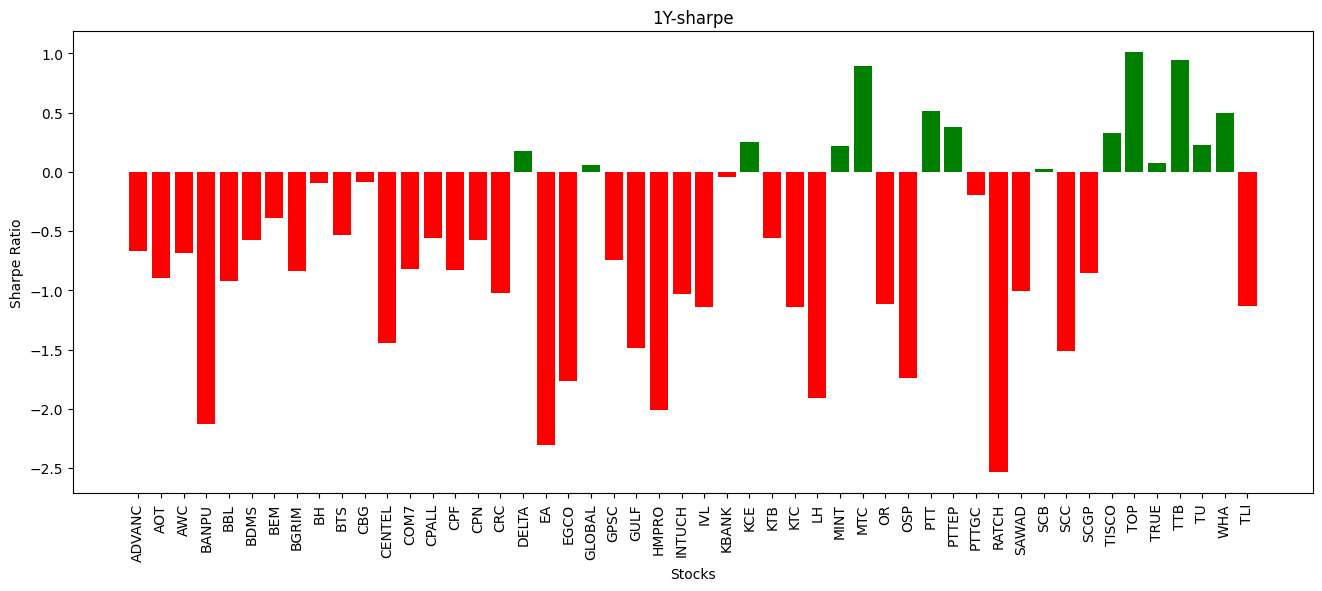

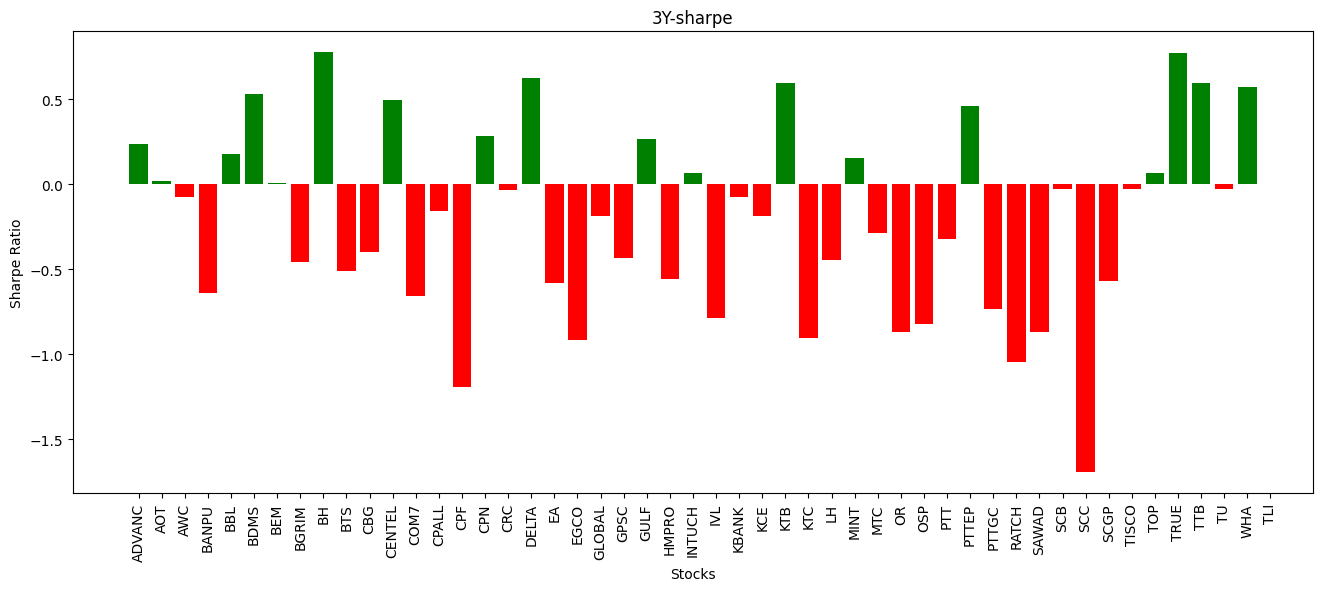

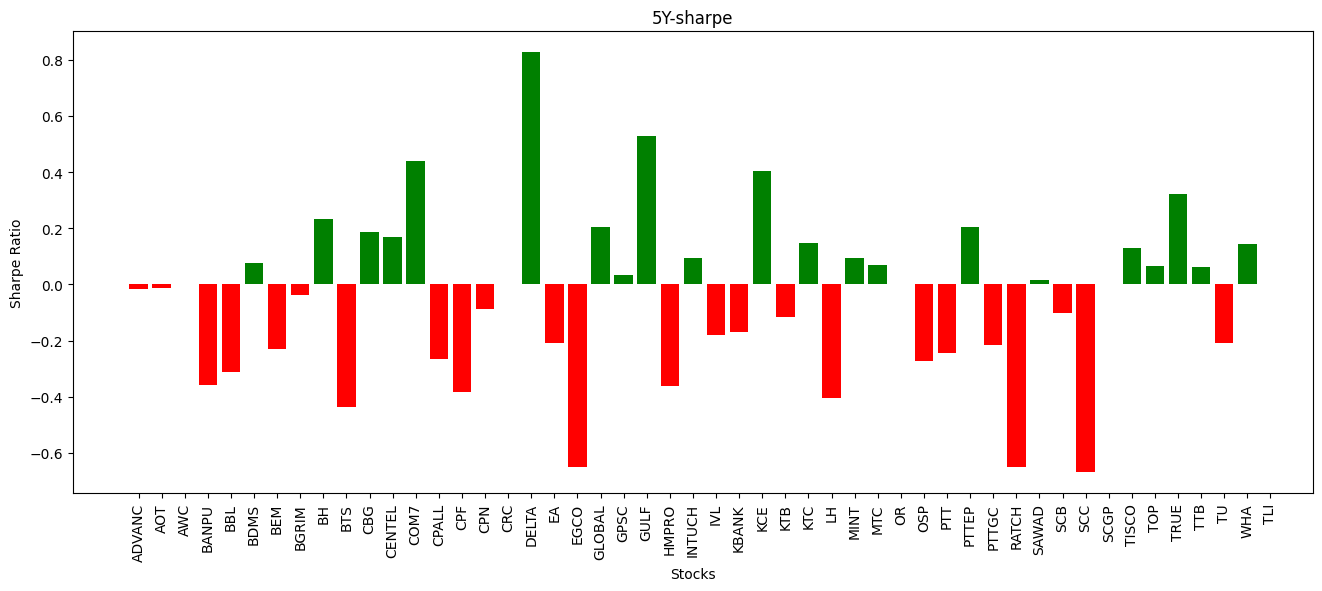

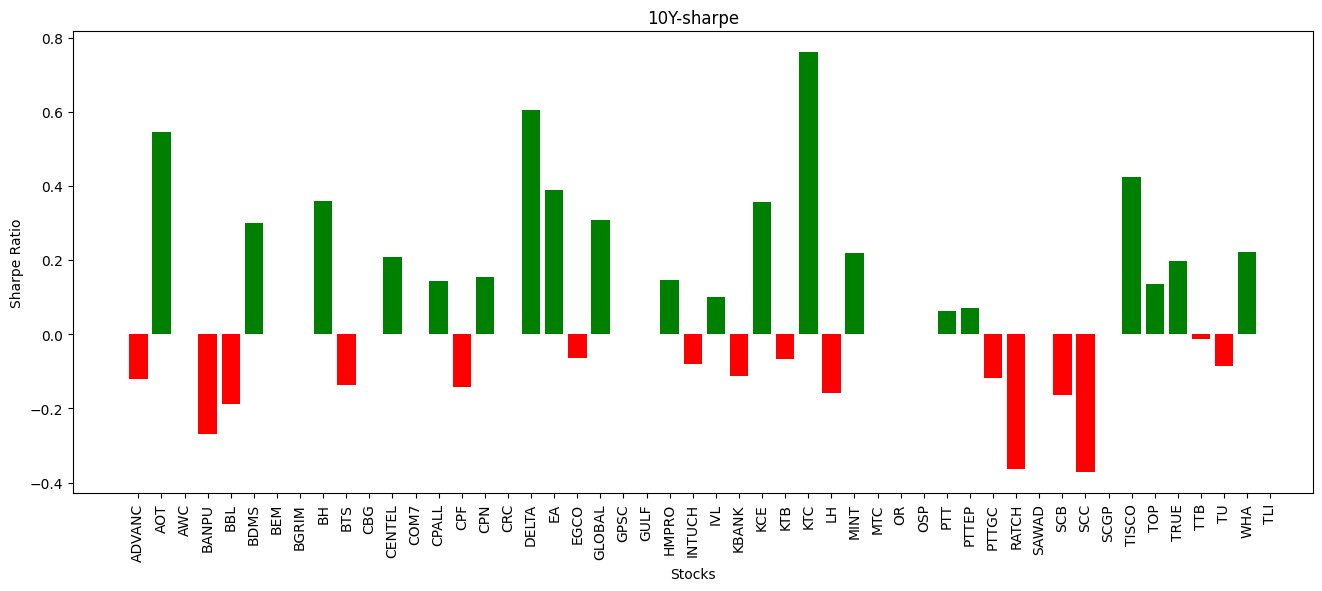

"\nconclu['sname'] = conclu['SET50'].str[4:]\nplt.figure(figsize=(16,6))\ncolors = ['red' if x <0 else 'green' for x in conclu['avg_return']]\nplt.bar(conclu['sname'], conclu['avg_return'],color = colors)\nplt.xlabel('Stocks')\nplt.ylabel('Average Return')\nplt.xticks(rotation=90)\nplt.show()\n\nconclu['sname'] = conclu['SET50'].str[4:]\nplt.figure(figsize=(16,6))\nplt.bar(conclu['sname'], conclu['std'],color = 'red')\nplt.xlabel('Stocks')\nplt.ylabel('Risks')\nplt.xticks(rotation=90)\nplt.show()\n"

In [31]:
import matplotlib.pyplot as plt
for i in range (len(interval)):
    conclu['sname'] = conclu['SET50'].str[4:]
    plt.figure(figsize=(16,6))
    colors = ['red' if x <0 else 'green' for x in conclu[interval[i]]]
    plt.bar(conclu['sname'], conclu[interval[i]],color = colors)
    plt.xlabel('Stocks')
    plt.ylabel('Sharpe Ratio')
    plt.title(interval[i])
    plt.xticks(rotation=90)
    plt.show()

'''
conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
colors = ['red' if x <0 else 'green' for x in conclu['avg_return']]
plt.bar(conclu['sname'], conclu['avg_return'],color = colors)
plt.xlabel('Stocks')
plt.ylabel('Average Return')
plt.xticks(rotation=90)
plt.show()

conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
plt.bar(conclu['sname'], conclu['std'],color = 'red')
plt.xlabel('Stocks')
plt.ylabel('Risks')
plt.xticks(rotation=90)
plt.show()
'''

Benchmark (SET50)

In [32]:
set_sharpe=[]
dog = [12,36,60,120]
for i in range(len(dog)):
    data = df_return['set50'].iloc[-dog[i]:]
    mean = data.mean() * 12
    std = data.std() * sqrt(12)
    set_sharpe.append((mean - rf)/std)
set_sharpe

[-1.0584220470016645,
 -0.5151470046066435,
 -0.33757684362531754,
 -0.16026827909120295]

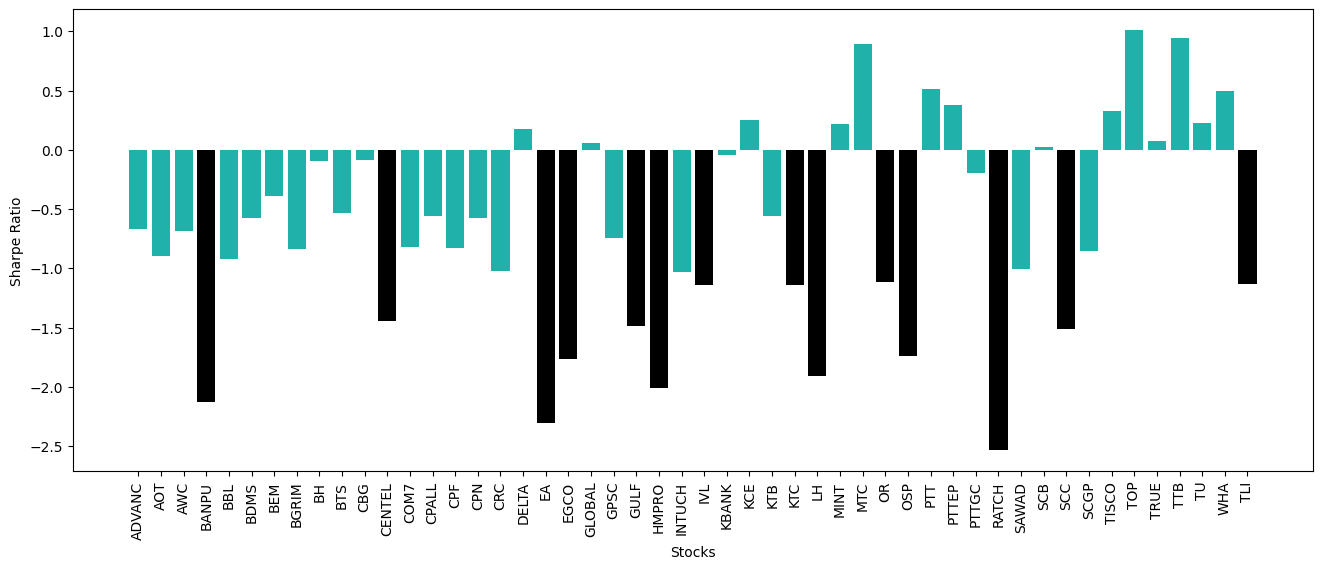

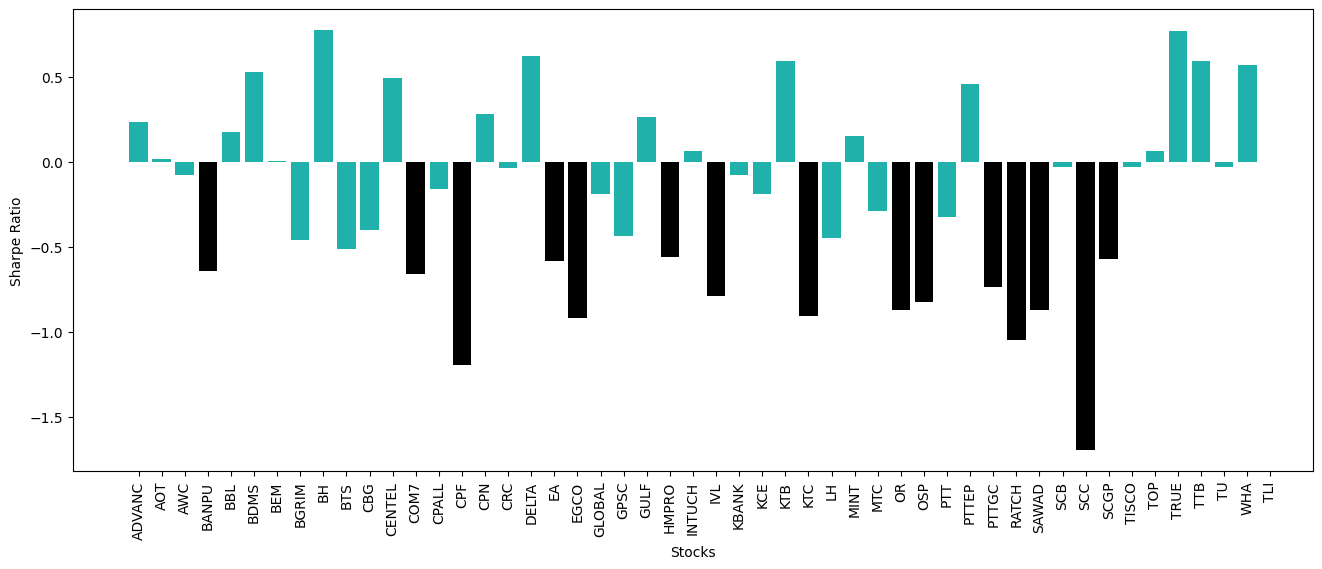

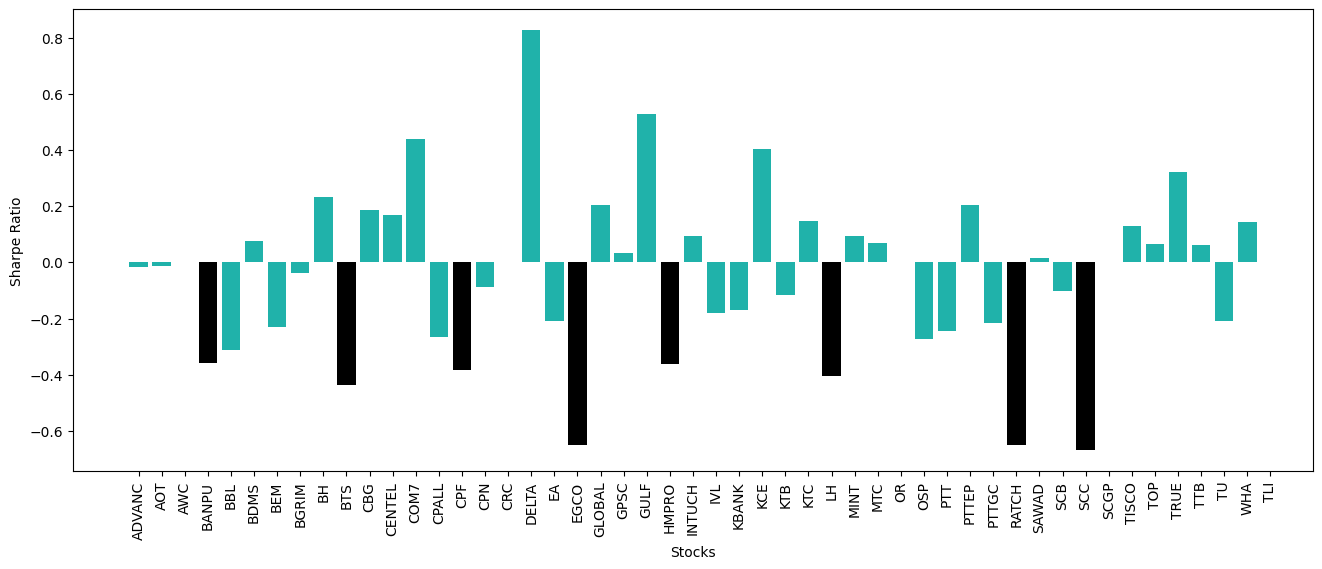

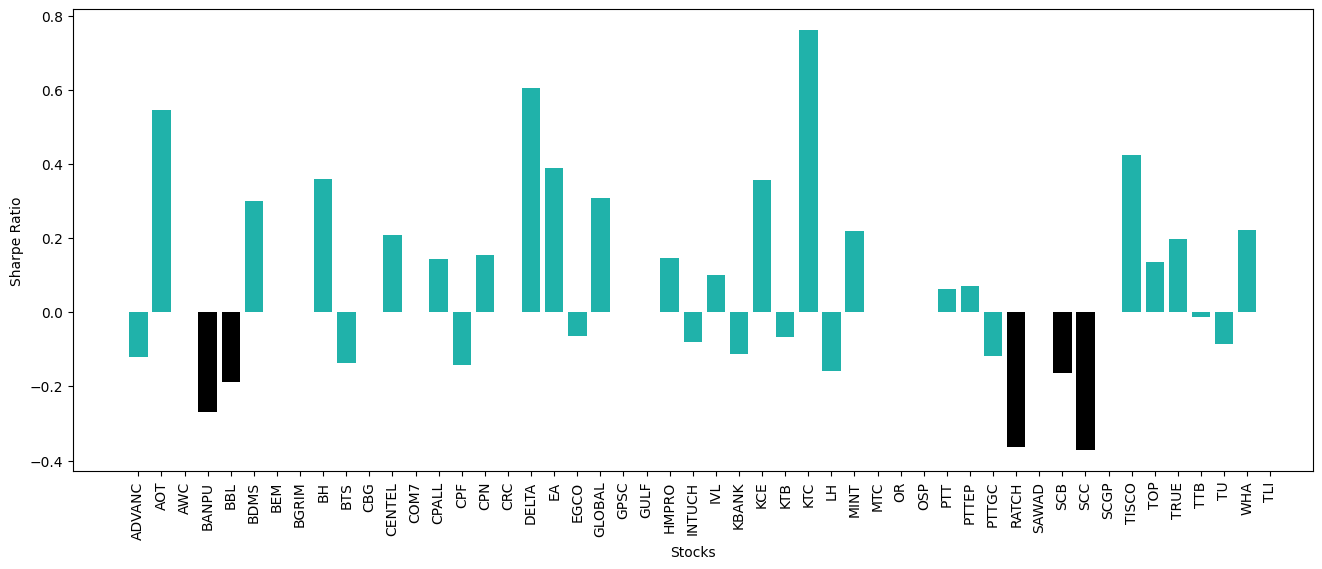

In [33]:
for i in range (len(interval)):
    conclu['sname'] = conclu['SET50'].str[4:]
    plt.figure(figsize=(16,6))
    colors = ['black' if x <set_sharpe[i] else 'lightseagreen' for x in conclu[interval[i]]]
    plt.bar(conclu['sname'], conclu[interval[i]],color = colors)
    plt.xlabel('Stocks')
    plt.ylabel('Sharpe Ratio')
    plt.xticks(rotation=90)
    plt.show()